In [1]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Define paths
base_path = '/Users/priyank/Desktop/ML4QS-project/Combined 80mins/Combined_80min_data/'
files = [
    'Combined_accelerometer_80min.csv',
    'Combined_gyroscope_80min.csv',
    'Combined_linear_accelerometer_80min.csv',
    'Combined_magnetometer_80min.csv'
]

In [3]:
# Load and combine the datasets
dataframes = []
sensor_types = ['accelerometer', 'gyroscope', 'linear_accelerometer', 'magnetometer']
sensor_columns = {}
for file, sensor in zip(files, sensor_types):
    df = pd.read_csv(base_path + file)
    sensor_columns[sensor] = [f'{sensor}_{col}' for col in df.columns if col not in ['time', 'label']]
    df = df.rename(columns={col: f'{sensor}_{col}' for col in df.columns if col not in ['time', 'label']})
    dataframes.append(df)

combined_data = pd.concat(dataframes, axis=1)
print("Data successfully loaded and combined.")

# Remove duplicate 'label' columns keeping only the first occurrence
combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]

# Print first few rows of the combined data
print(combined_data.head())

Data successfully loaded and combined.
   time  accelerometer_X (m/s^2)  accelerometer_Y (m/s^2)  \
0   0.0                 9.986539                -0.004582   
1   0.5                 5.105301                -0.415617   
2   1.0                 8.871006                -2.852091   
3   1.5                 8.871006                -5.486469   
4   2.0                 9.990088                -5.486469   

   accelerometer_Z (m/s^2)      label  gyroscope_X (rad/s)  \
0                 0.850397  handshake            -0.351920   
1                 0.850397  handshake             0.100001   
2                 0.976863  handshake             0.392478   
3                 1.202958  handshake             0.049560   
4                 1.151986  handshake             0.057486   

   gyroscope_Y (rad/s)  gyroscope_Z (rad/s)  linear_accelerometer_X (m/s^2)  \
0            -0.527611             0.563546                        0.985623   
1            -0.372286            -0.199083                    

In [4]:
# Assuming the target column is named 'label' and is present in all files
target = 'label'

# Define feature columns (excluding time and target columns)
feature_columns = combined_data.columns.difference(['time', target])

# Ensure there are no NaN values
combined_data.dropna(inplace=True)

# Split the data into features and target
X = combined_data[feature_columns]
y = combined_data[target]


Accuracy: 0.9582


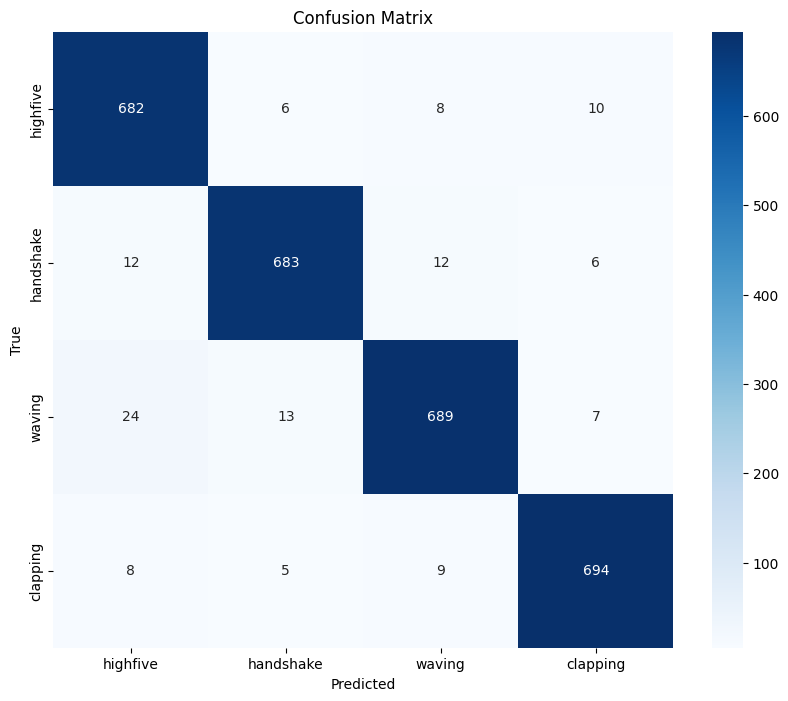

Classification Report:
              precision    recall  f1-score   support

    clapping       0.94      0.97      0.95       706
   handshake       0.97      0.96      0.96       713
    highfive       0.96      0.94      0.95       733
      waving       0.97      0.97      0.97       716

    accuracy                           0.96      2868
   macro avg       0.96      0.96      0.96      2868
weighted avg       0.96      0.96      0.96      2868



In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=5, random_state=24)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
# Plot the confusion matrix with nicer formatting
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(class_report)

# Feature importance without feature engineering

In [6]:
def extract_sensor_type(feature_name):
    if 'lin_acc' in feature_name:
        return 'Linear Accelerometer'
    elif 'acc' in feature_name and 'lin' not in feature_name:
        return 'Accelerometer'
    elif 'gyro' in feature_name or 'rad/s' in feature_name:
        return 'Gyroscope'
    elif 'mag' in feature_name or 'µT' in feature_name:
        return 'Magnetometer'
    else:
        return 'Unknown'

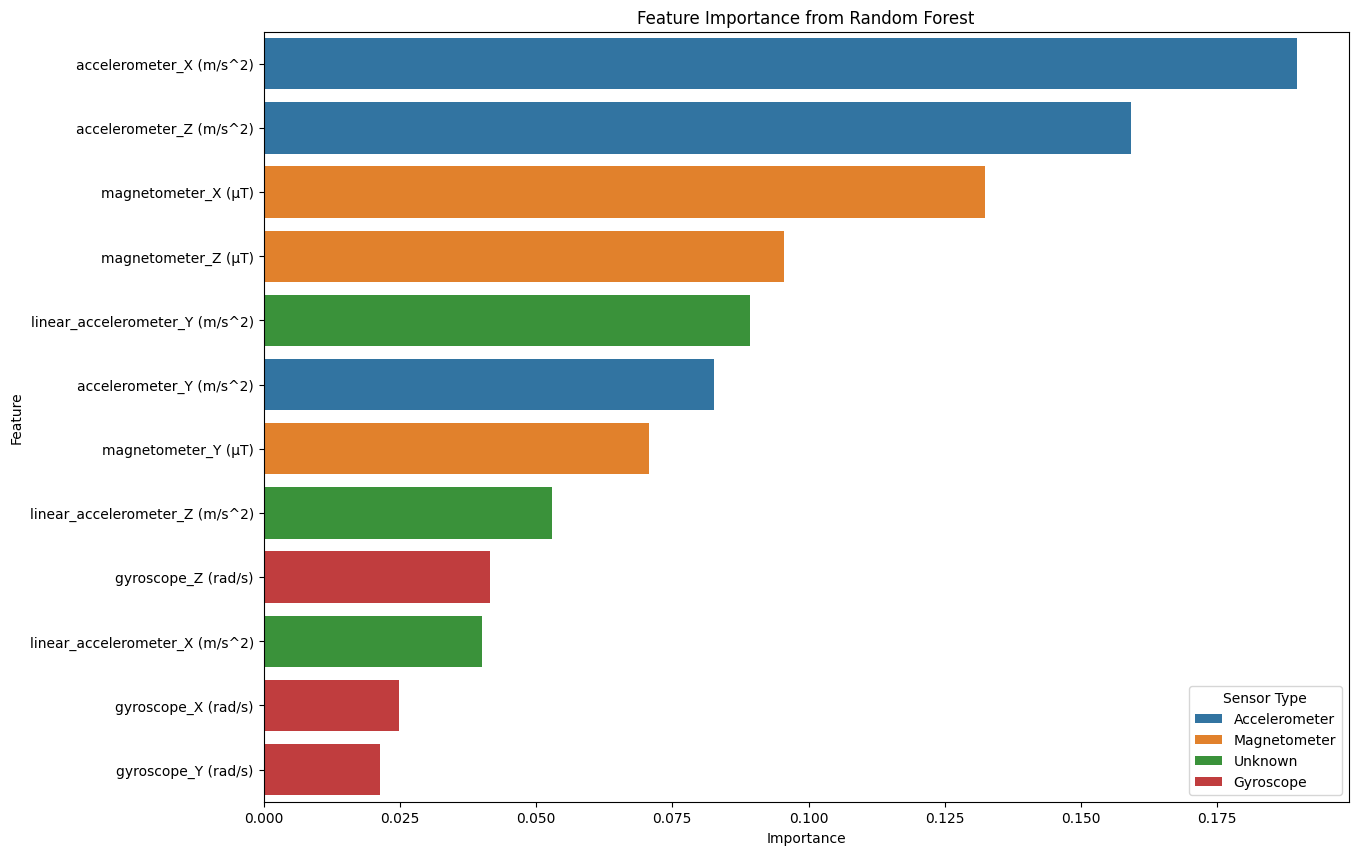

In [7]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Correctly map the feature names to the features used in the model
feature_names = feature_columns.tolist()

# Ensure feature_names matches the actual features used in the model
assert len(feature_names) == len(feature_importances), "Mismatch between feature names and importances lengths."

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Assign sensor type to each feature
importance_df['Sensor'] = importance_df['Feature'].apply(extract_sensor_type)

# Plot feature importances with sensor type indicated
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', hue='Sensor', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend(title='Sensor Type')
plt.show()

# With Feature Engineering

In [8]:
accelerometer_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 80mins/Combined_80min_data/Combined_accelerometer_80min.csv')
gyroscope_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 80mins/Combined_80min_data/Combined_gyroscope_80min.csv')
linear_accelerometer_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 80mins/Combined_80min_data/Combined_linear_accelerometer_80min.csv')
magnetometer_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 80mins/Combined_80min_data/Combined_magnetometer_80min.csv')


Accuracy: 0.9822


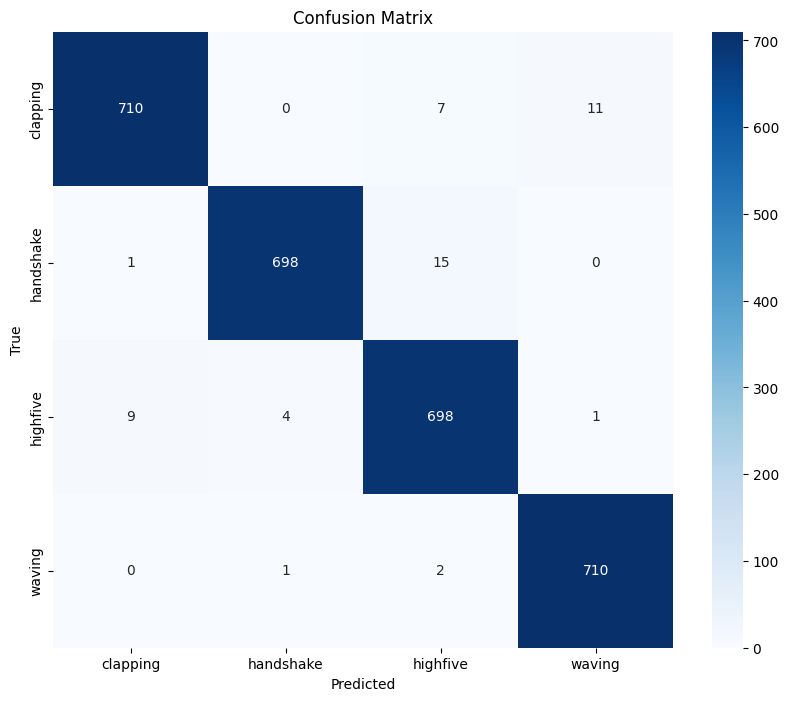

Classification Report:
              precision    recall  f1-score   support

    clapping       0.99      0.98      0.98       728
   handshake       0.99      0.98      0.99       714
    highfive       0.97      0.98      0.97       712
      waving       0.98      1.00      0.99       713

    accuracy                           0.98      2867
   macro avg       0.98      0.98      0.98      2867
weighted avg       0.98      0.98      0.98      2867

Cross-validation scores: [0.78085774 0.94610152 0.93040293 0.84301413 0.9544741 ]
Mean cross-validation score: 0.8910


In [9]:
# Function to add lagged features and rolling statistics
def add_time_features(df, lags, rolling_windows):
    for feature in df.columns:
        if feature not in ['time', 'label']:
            for lag in lags:
                df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
            for window in rolling_windows:
                df[f'{feature}_rolling_mean_{window}'] = df[feature].rolling(window=window).mean()
                df[f'{feature}_rolling_std_{window}'] = df[feature].rolling(window=window).std()
                df[f'{feature}_ewma'] = df[feature].ewm(span=10).mean()
    return df

# Example lags and rolling windows
lags = [3]
rolling_windows = [5]

# Combine all data into one dataframe
combined_data = pd.merge(accelerometer_data, gyroscope_data, on=['time', 'label'], suffixes=('_acc', '_gyro'))
combined_data = pd.merge(combined_data, linear_accelerometer_data, on=['time', 'label'], suffixes=('', '_lin_acc'))
combined_data = pd.merge(combined_data, magnetometer_data, on=['time', 'label'], suffixes=('', '_mag'))

# Add time-based features
combined_data = add_time_features(combined_data, lags, rolling_windows)

# Drop rows with NaN values generated by lagging and rolling
combined_data.dropna(inplace=True)

# Encode labels
label_encoder = LabelEncoder()
combined_data['label_encoded'] = label_encoder.fit_transform(combined_data['label'])

# Update feature columns after adding new features
feature_columns = combined_data.columns.difference(['time', 'label', 'label_encoded'])

# Split the data into features and target
X = combined_data[feature_columns]
y = combined_data['label_encoded']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=24)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=5, random_state=24)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.4f}")
# Plot the confusion matrix with nicer formatting
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(class_report)

# Cross-validation scores
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")


In [10]:
# Correcting the sensor type extraction function to include all cases for accelerometer, gyroscope, linear accelerometer, and magnetometer
def extract_sensor_type(feature_name):
    if 'X (m/s^2)' in feature_name or 'Y (m/s^2)' in feature_name or 'Z (m/s^2)' in feature_name:
        if 'lin_acc' in feature_name:
            return 'Linear Accelerometer'
        else:
            return 'Accelerometer'
    elif 'acc' in feature_name and 'lin' not in feature_name:
        return 'Accelerometer'
    elif 'gyro' in feature_name or 'rad/s' in feature_name:
        return 'Gyroscope'
    elif 'lin_acc' in feature_name:
        return 'Linear Accelerometer'
    elif 'µT' in feature_name:
        return 'Magnetometer'
    else:
        return 'Unknown'


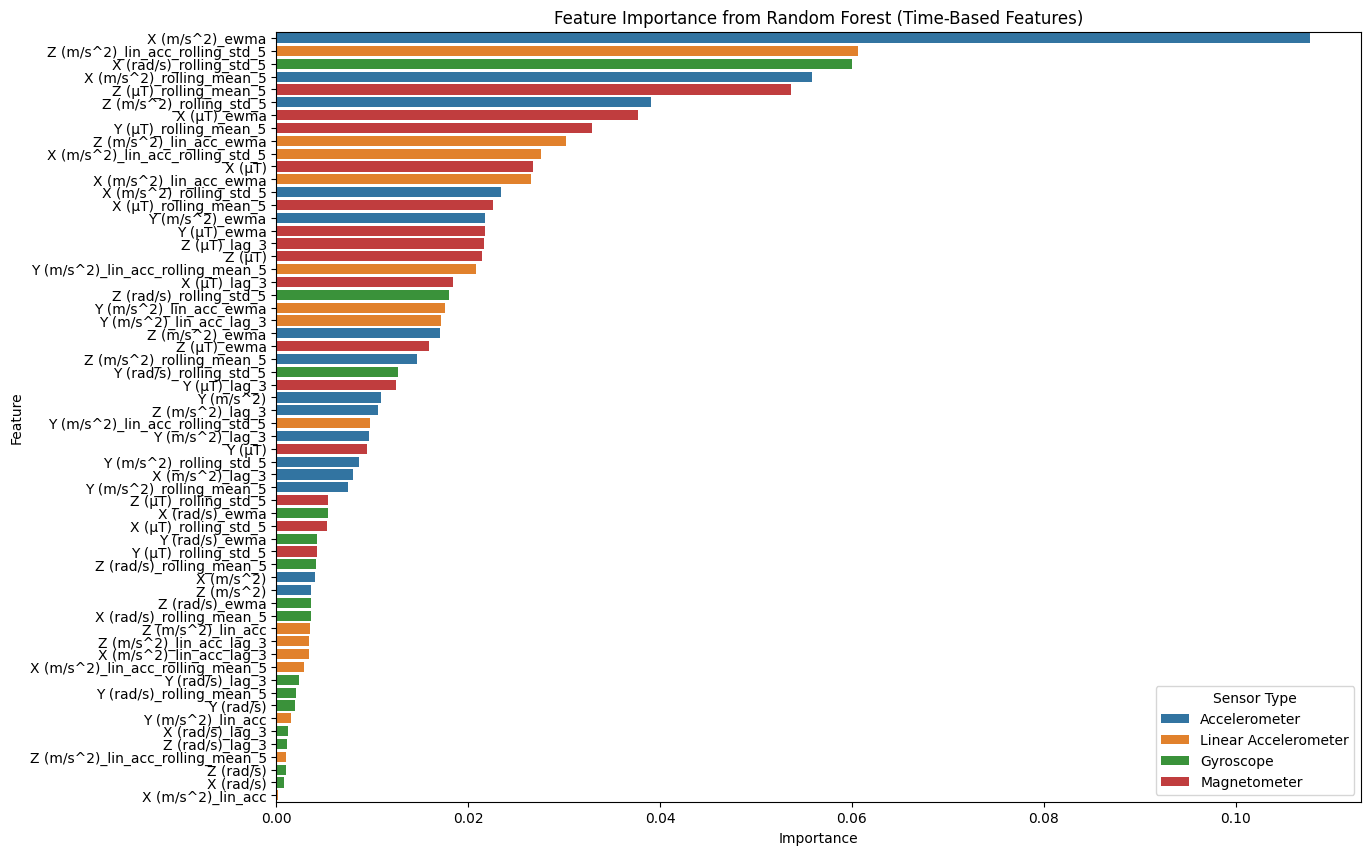

In [11]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Ensure feature_names matches the actual features used in the model
feature_names = feature_columns.tolist()
assert len(feature_names) == len(feature_importances), "Mismatch between feature names and importances lengths."

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
# Correct sensor type extraction function
importance_df['Sensor'] = importance_df['Feature'].apply(extract_sensor_type)

# Plot feature importances with sensor type indicated
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', hue='Sensor', data=importance_df)
plt.title('Feature Importance from Random Forest (Time-Based Features)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend(title='Sensor Type')
plt.show()

# Fourier Transform Feature Engineering

In [12]:
# Load each dataset
accelerometer_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 80mins/Combined_80min_data/Combined_accelerometer_80min.csv')
gyroscope_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 80mins/Combined_80min_data/Combined_gyroscope_80min.csv')
linear_accelerometer_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 80mins/Combined_80min_data/Combined_linear_accelerometer_80min.csv')
magnetometer_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 80mins/Combined_80min_data/Combined_magnetometer_80min.csv')


merged_data = pd.merge(accelerometer_data, gyroscope_data, on=['time', 'label'], suffixes=('_acc', '_gyro'))
merged_data = pd.merge(merged_data, linear_accelerometer_data, on=['time', 'label'], suffixes=('', '_lin_acc'))
merged_data = pd.merge(merged_data, magnetometer_data, on=['time', 'label'], suffixes=('', '_mag'))

In [13]:
# Function to compute FFT features for each column and ensure proper label alignment
def compute_fft_features_correct(data, columns):
    fft_features = {}
    min_len = len(data)
    for col in columns:
        fft_vals = fft(data[col].values)
        fft_vals = fft_vals[:min_len]  # Ensure all FFT values are of the same length
        fft_features[f'{col}_fft_real'] = np.real(fft_vals)
        fft_features[f'{col}_fft_imag'] = np.imag(fft_vals)
        fft_features[f'{col}_fft_abs'] = np.abs(fft_vals)
    return pd.DataFrame(fft_features)

# Select the columns to compute FFT features
sensor_columns = [col for col in merged_data.columns if col not in ['time', 'label']]

# Re-compute FFT features for the merged dataset
fft_features_correct = compute_fft_features_correct(merged_data, sensor_columns)

# Combine the FFT features with the original time-domain features
combined_features = pd.concat([merged_data[sensor_columns], fft_features_correct], axis=1)
combined_features['label'] = merged_data['label'][:len(fft_features_correct)]


In [14]:
# Encode the labels
label_encoder = LabelEncoder()
combined_features['label_encoded'] = label_encoder.fit_transform(combined_features['label'])

# Split the data into training and testing sets
X_combined = combined_features.drop(columns=['label', 'label_encoded'])
y_combined = combined_features['label_encoded']
X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=24)

# Train a Random Forest classifier with combined features
rf_classifier_combined = RandomForestClassifier(n_estimators=5, random_state=24)
rf_classifier_combined.fit(X_combined_train, y_combined_train)

# Make predictions on the test set
y_combined_pred = rf_classifier_combined.predict(X_combined_test)

In [15]:
# Evaluate the model
accuracy_combined = accuracy_score(y_combined_test, y_combined_pred)
classification_rep_combined = classification_report(y_combined_test, y_combined_pred, target_names=label_encoder.classes_)


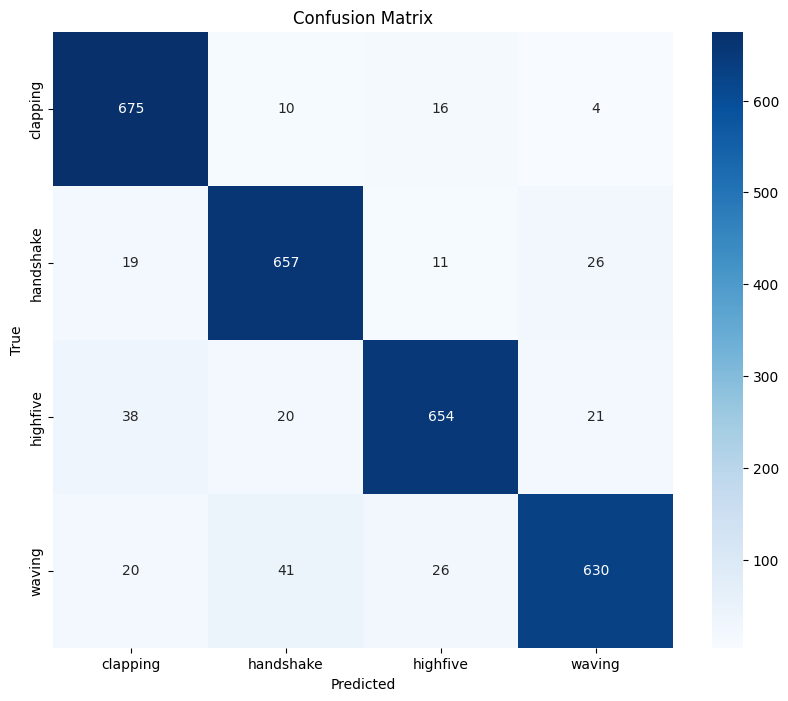

Accuracy: 0.9121
Classification Report:
              precision    recall  f1-score   support

    clapping       0.90      0.96      0.93       705
   handshake       0.90      0.92      0.91       713
    highfive       0.93      0.89      0.91       733
      waving       0.93      0.88      0.90       717

    accuracy                           0.91      2868
   macro avg       0.91      0.91      0.91      2868
weighted avg       0.91      0.91      0.91      2868



In [16]:
# Compute confusion matrix
conf_matrix_combined = confusion_matrix(y_combined_test, y_combined_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_combined, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report and accuracy
print(f"Accuracy: {accuracy_combined:.4f}")
print("Classification Report:")
print(classification_rep_combined)

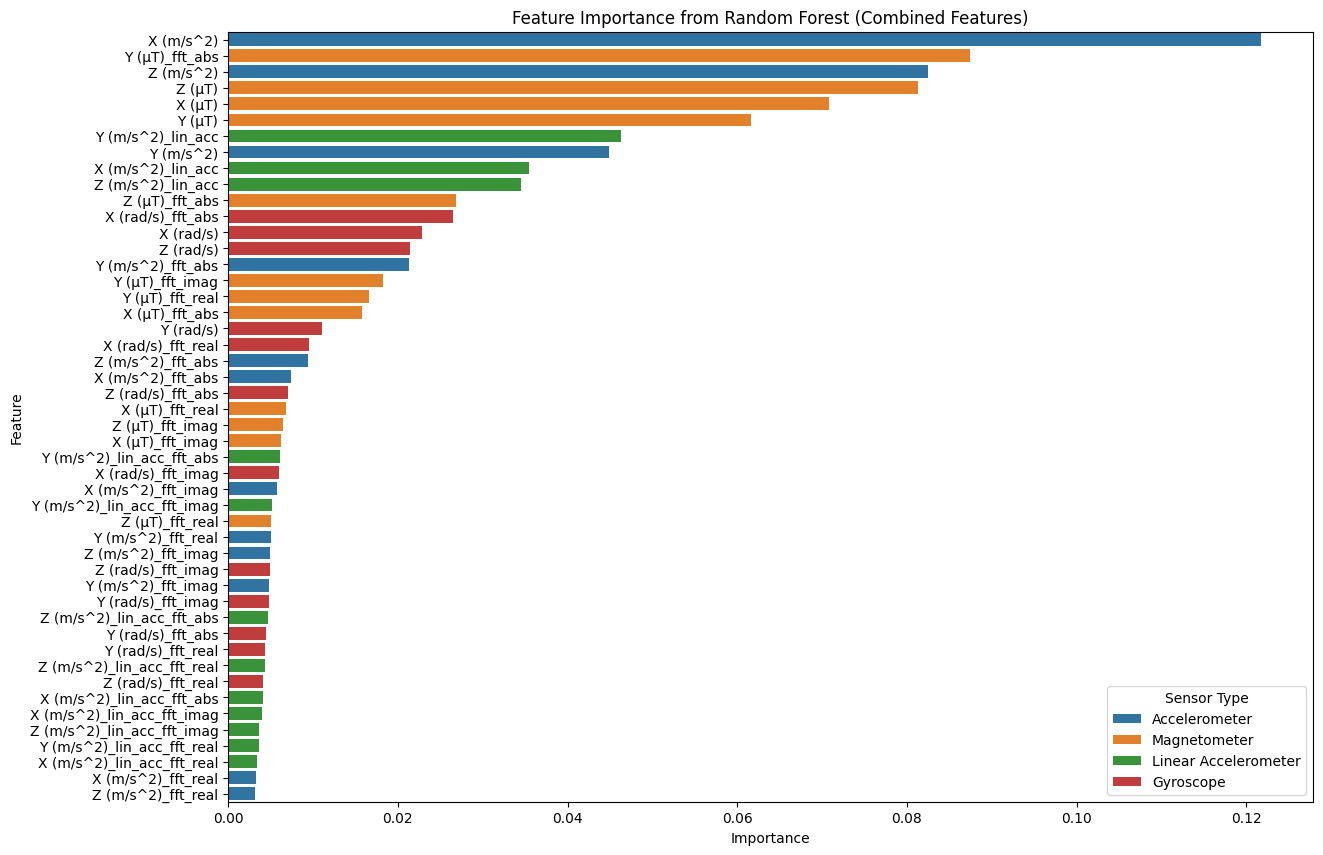

In [17]:

# Get feature importances
feature_importances_combined = rf_classifier_combined.feature_importances_

# Create a DataFrame for visualization
feature_names_combined = X_combined.columns.tolist()
importance_df_combined = pd.DataFrame({'Feature': feature_names_combined, 'Importance': feature_importances_combined})
importance_df_combined = importance_df_combined.sort_values(by='Importance', ascending=False)


importance_df_combined['Sensor'] = importance_df_combined['Feature'].apply(extract_sensor_type)

# Plot feature importances with sensor type indicated
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', hue='Sensor', data=importance_df_combined)
plt.title('Feature Importance from Random Forest (Combined Features)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend(title='Sensor Type')
plt.show()
